In [1]:
push!(LOAD_PATH, ".")
using GWBeliefMDPs
using POMDPToolbox
using POMDPs
using GenerativeModels
using OfficialProblems
using Interact
value = Reactive.value
using POMDPModels

INFO: Recompiling stale cache file /home/zach/.julia/lib/v0.5/POMDPs.ji for module POMDPs.
INFO: Recompiling stale cache file /home/zach/.julia/lib/v0.5/GenerativeModels.ji for module GenerativeModels.
INFO: Recompiling stale cache file /home/zach/.julia/lib/v0.5/POMDPModels.ji for module POMDPModels.


[2016-11-14 11:26:54,118] Making new env: MountainCarContinuous-v0


In [5]:
rec = HistoryRecorder(max_steps=100, rng=MersenneTwister(456))
policy = GoToMostLikely(p3.base)
simulate(rec, p3, policy, initial_state(p3, rec.rng))

20.586216237782175

In [6]:
function bel(s, b)
    r = get(GWBeliefMDPs.BACK_RMAP, (s.x,s.y), 0)
    if 0 < r < 4
        return b.b[r]
    elseif r == 4
        return 1.0-sum(b.b)
    else
        return 0.0
    end
end

bel (generic function with 1 method)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"t",50,1:100,"d",true)

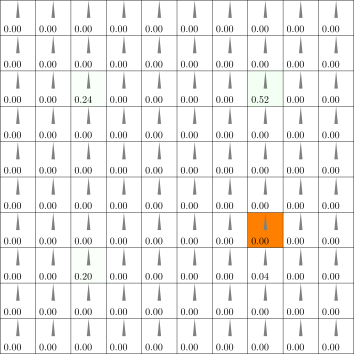

In [7]:
base = p3.base.base.base
base_states = iterator(states(base))
@manipulate for t in 1:length(rec.reward_hist)
    b = GWBelief(p3.base, rec.state_hist[t])
    a_int = rec.action_hist[t]
    if a_int <= 4
        a = GridWorldAction([:left,:right,:up,:down][a_int])
        p = plot(base, s->bel(s,b), VectorPolicy(base, fill(a, 100)), GridWorldState(b.x,b.y))
    else
        p = plot(base, map(s->bel(s,b),base_states), GridWorldState(b.x,b.y))
    end
    p
end

  1.257511 seconds (16.74 M allocations: 818.629 MB, 9.67% gc time)


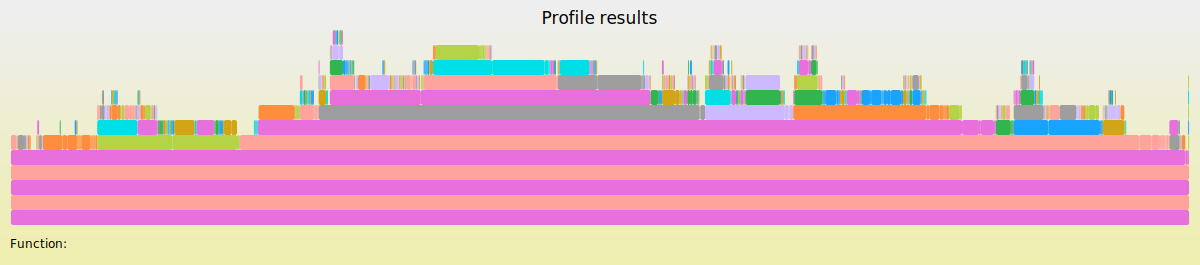

In [6]:
using ProfileView

Profile.clear()
@profile @time for i in 1:1000
    simulate(rec, p3, policy, initial_state(p3, rec.rng))
end

ProfileView.view()